In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('churn_prediction.csv')

In [3]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [4]:
bins=[0,15,60,91]
group=['children', 'adults' , 'senior citizens']
data['type']=pd.cut(data['age'], bins , labels=group)

In [5]:
data['Age_category']=type

In [6]:
data['days_since_last_transaction'].fillna('69' , inplace=True)
data['city'].fillna('796' , inplace=True)
data['occupation'].fillna('self_employed' , inplace=True)

In [7]:
data['dependents'].fillna(data['dependents'].mean(), inplace=True)

In [8]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [9]:
data['gender'].fillna('Male', inplace=True) , data.isnull().sum()

(None,
 customer_id                       0
 vintage                           0
 age                               0
 gender                            0
 dependents                        0
 occupation                        0
 city                              0
 customer_nw_category              0
 branch_code                       0
 days_since_last_transaction       0
 current_balance                   0
 previous_month_end_balance        0
 average_monthly_balance_prevQ     0
 average_monthly_balance_prevQ2    0
 current_month_credit              0
 previous_month_credit             0
 current_month_debit               0
 previous_month_debit              0
 current_month_balance             0
 previous_month_balance            0
 churn                             0
 type                              0
 Age_category                      0
 dtype: int64)

In [10]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
type                              0
Age_category                      0
dtype: int64

In [11]:
data['gender'].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [12]:
new=pd.get_dummies(data['gender'])

In [13]:
df = pd.DataFrame(data)

In [14]:
df['gender']=pd.get_dummies(data['gender'])

In [15]:
df['occupation']=pd.get_dummies(data['occupation'])
df.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,type,Age_category
28377,30297,1845,10,1,0.0,0,1020,2,1207,70,...,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,children,<class 'type'>
28378,30298,4919,34,1,0.0,0,1046,2,223,14,...,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,adults,<class 'type'>
28379,30299,297,47,0,0.0,0,1096,2,588,0,...,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,adults,<class 'type'>
28380,30300,2585,50,0,3.0,0,1219,3,274,69,...,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,adults,<class 'type'>
28381,30301,2349,18,0,0.0,0,1232,2,474,59,...,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,adults,<class 'type'>


In [16]:
df['type']=pd.get_dummies(data['type'])

In [17]:
df['occupation'].value_counts()

0    28342
1       40
Name: occupation, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [19]:
df=pd.get_dummies(data)

In [20]:
x=df.drop(['churn'], axis=1)
y=df['churn']

In [21]:
x.shape, y.shape

((28382, 1986), (28382,))

In [22]:
x_scaled=scaler.fit_transform(x)

In [23]:
x=pd.DataFrame(x_scaled, columns=x.columns)

In [24]:
x.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,current_balance,previous_month_end_balance,...,days_since_last_transaction_357.0,days_since_last_transaction_359.0,days_since_last_transaction_360.0,days_since_last_transaction_361.0,days_since_last_transaction_362.0,days_since_last_transaction_363.0,days_since_last_transaction_364.0,days_since_last_transaction_365.0,days_since_last_transaction_69,Age_category_<class 'type'>
0,0.000000,0.232330,0.730337,0.0,0.000000,0.0,0.5,0.157708,0.001178,0.000802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000033,0.010221,0.382022,0.0,0.000000,0.0,0.5,0.672035,0.001843,0.002064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000099,0.171083,0.337079,0.0,0.000000,0.0,0.5,0.008366,0.001593,0.001561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000132,0.023430,1.000000,0.0,0.006678,0.0,0.5,0.121523,0.001319,0.000947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000165,0.184842,0.460674,0.0,0.038462,0.0,1.0,0.080945,0.001088,0.000792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y , random_state=56, stratify=y)

# KNN Model

In [26]:
#importing KNN classifier and metric F1 score

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [28]:
from sklearn.metrics import f1_score

In [29]:
clf=KNC(n_neighbors=5)

In [30]:
clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
test_predict=clf.predict(test_x)
k=f1_score(test_predict, test_y)
print('Test F1 score  ' ,k)

Test F1 score   0.07429245283018866


In [32]:
#ELBOW for classifier

In [33]:
def elbow(K):
    test_error=[]
    for i in K:
        clf=KNC(n_neighbors=i)
        clf.fit(train_x, train_y)
        tmp=clf.predict(test_x)
        tmp=f1_score(tmp, test_y)
        error=1-tmp
        test_error.append(error)
    return test_error

In [36]:
k=range(6,10,2)

In [37]:
test=elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

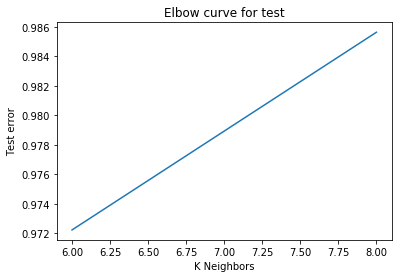

In [38]:
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow curve for test')

In [39]:
# we take 5 to be the kNearest neighbors value

In [41]:
y=df['churn']
x=df.drop(['churn'] , axis=1)

In [43]:
train_y.value_counts(normalize=True)

0    0.814667
1    0.185333
Name: churn, dtype: float64

In [46]:
test_y.value_counts(normalize=True)

0    0.814684
1    0.185316
Name: churn, dtype: float64

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_model=DecisionTreeClassifier(random_state=10)

In [49]:
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [50]:
dt_model.score(train_x,train_y)

1.0

In [51]:
dt_model.score(test_x, test_y)

0.7938275084554679

In [52]:
dt_model.predict(test_x)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
dt_model.predict_proba(test_x)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [54]:
y_pred=dt_model.predict_proba(test_x)[:,1]

In [55]:
new_y=[]
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(test_y,new_y)

0.7938275084554679

In [58]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    test_accuracy.append(dt_model.score(test_x, test_y))

In [59]:
frame=pd.DataFrame({'max_depth' : range(1,10) , 'train_acc' : train_accuracy , 'test_acc' : test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.846519,0.845265
1,2,0.846519,0.845265
2,3,0.851264,0.852029
3,4,0.858827,0.847661
4,5,0.863478,0.850338


No handles with labels found to put in legend.


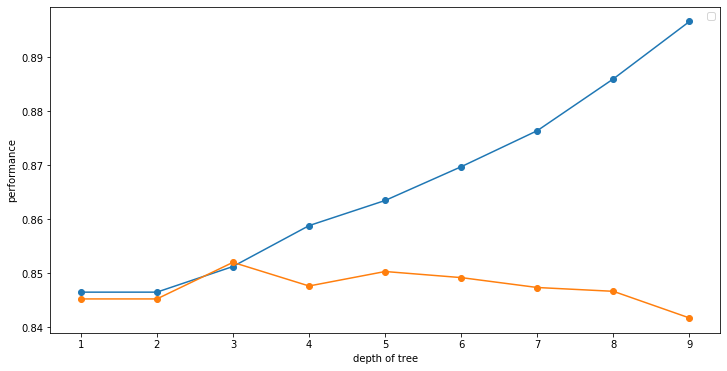

In [60]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'] , frame['train_acc'] , marker='o')
plt.plot(frame['max_depth'] , frame['test_acc'] , marker='o')
plt.xlabel('depth of tree')
plt.ylabel('performance')
plt.legend()

In [62]:
# we consider the max depth to be 5 from the above graph
dt_model=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=25 , random_state=10)
dt_model.fit(train_x, train_y)
dt_model.score(train_x, train_y)
dt_model.score(test_x, test_y)

0.8518883878241262

In [63]:
from sklearn import tree

In [65]:
decision_tree=tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=train_x.columns, max_depth=2,filled=True)

In [66]:
!dot -Tpng tree.dot -o tree.png

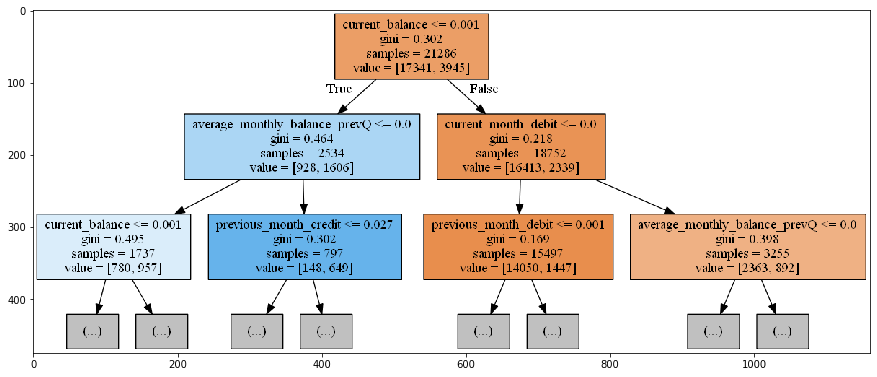

In [67]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)